### Author: Abdelwahed Ashraf 

### Linkedin: [Link](https://www.linkedin.com/in/abdelwahed-ashraf-090523169/)

### Kaggle: [Link](https://www.kaggle.com/abdelwahed43)

*If this Kernel helped you in any way,I would be very much appreciated to your <font color='red'>UPVOTES</font>*

# Notebook Objective
The objective of this notebook is to follow a step-by-step workflow, explaining each step and rationale for every decision we take during solution development.

For this project, the problem statement is given to us on a golden plater, develop an algorithm to predict the survival outcome of passengers on the Titanic.

## Overview
The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Why using pipelines to do preprocessing is important?
Pipelines are great because they package your data processing and model fitting into a single package. This makes it easy to manage complex models and do feature engineering. Pipelines are even better becuase they eliminate aspects of data leakage. 

Data leakage is a major problem when developing a machine learning model. Typically, it causes a model to have seemingly high performance in the training and even validation stages. However, once the model is deployed in production (i.e. predicting unseen test data) it is likely to perform much worse than anticipated. A common cause of data leakage is Train-Test split contamination. This can occur, for example, when a preprocessing step is fit to both train and validation datasets (i.e. fitting a SimpleImpute before calling train-test split). With pipelines this can easily be avoided as perprocessing is applied independtly on the train and validation data. 


## Outline
The following sections are included in this notebook:

### A. [Load and Parse Data](#section-one)

### B. [Exploratory Data Analysis (EDA)](#section-two)
   1. [Missing Data](#section-two-a)    
   2. [Distribution of the Target Variable](#section-two-b)    
   3. [Distribution of the Numeric Feature Variable](#section-two-c)
   4. [Outliers](#section-two-d)
   5. [Categorical Feature Cardinality](#section-two-e)
    
### C. [Preprocessing](#section-three)
   1. [Initial Preprocessing](#section-three-a)
   2. [Building a Preprocessing Pipeline](#section-three-b)
       * [Define custom transformers](#section-three-b1)
       * [Define helper functions](#section-three-b2)
       * [Define Training Data](#section-three-b3)
       * [Define datatypes and encoding](#section-three-b4)
       * [Build the preprocessing pipeline](#section-three-b5)
      
        
### D. [Fit and Evaluate the Model](#section-four)
   1. [Cross-Validation](#section-four-a)
       
       * Naive Bayes classifier
       * KNN or k-Nearest Neighbors  
       * Random Forest 
       * Logistic Regression             
       * Support Vector Machines  
       * Decision Tree
       * XGBOOST Classifier 
       * AdaBoosting Classifier
       * GradientBoostingClassifier 
       * HistGradientBoostingClassifier
       * Principal Component Analysis (PCA) 
       * Gaussian Mixture 
       * Grid Search
      
   
   2. [Model Stacking](#section-four-c)
    
### E. [Predict Test Dataset and Submit](#section-five)

<a id="section-one"></a>
# A. Load and Parse Data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames.
We also combine these datasets to run certain operations on both datasets together.

In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
#Read data from csv file
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')

<a id="section-two"></a>
# B. Exploratory Data Analysis (EDA)
The purpose of EDA is to get familiar with our data, but not so familiar that we begin making assumptions about the model fit! In Kaggle competitions it can be tempting to overfit the training data in hopes of a lower test score, but this often doesn't bode well for real world applications. Typically, it's best to let the data speak for itself and allow the model the flexibility to find correlations between the target and features. Afterall, the models in todays age are very robust. 

### Do Preprocessing Later!
This is really more of a personal opinion. I find it hard to keep track of data processing done in cells throughout an EDA section. Typically, I prefer to do all the preprocessing in a single code block or even better in a pipeline. This way I know the preprocessing is being applied the same way to the train, validation, and test datasets. I use EDA as a way to identify the preprocessing steps that need to take place and potential feature engineering opportunities. 

Remember, it's best to do preprocessing in a pipeline!!!

In this section I will explore the following common issues:
1. Missing Data
2. Distribution of the Target Variable
3. Distribution of the Feature Variables
4. Outliers
5. Categorical Feature Cardinality

# check shape of training and test set

In [3]:
print('The shape of our training set: ',df_train.shape[0], 'Passengers', 'and', df_train.shape[1] -1 , 'features' ,df_train.shape[1] , 'columns' )
print('The shape of our testing set: ',df_test.shape[0], 'Passengers', 'and', df_test.shape[1], 'features')
print('The testing set has 1 column  less than the training set, which is Survived , the target to predict  ')

The shape of our training set:  891 Passengers and 11 features 12 columns
The shape of our testing set:  418 Passengers and 11 features
The testing set has 1 column  less than the training set, which is Survived , the target to predict  


## Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.


### Which features are available in the dataset?

Noting the feature names for directly manipulating or analyzing these. These feature names are described on the [link](https://www.kaggle.com/c/titanic/data)

In [4]:
print(df_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
# preview the data from head
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# preview the data from tail
df_train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Descriptive statistics

### split training data into numeric and categorical data

In [7]:
# split data train into Numeric and Categorocal
numeric = df_train.select_dtypes(exclude='object')
categorical = df_train.select_dtypes(include='object')

#### Which features are categorical?


 * These values classify the samples into sets of similar samples.
 * Within categorical features are the values nominal, ordinal, ratio, or interval based? 
 * Among other things this helps us select the appropriate plots for visualization.

In [8]:
print("\nNumber of categorical features : ",(len(categorical.axes[1])))
print("\n", categorical.axes[1])
categorical.head()


Number of categorical features :  5

 Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [9]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gronnestad, Mr. Daniel Danielsen",male,CA. 2343,G6,S
freq,1,577,7,4,644


#### Which features are numerical?

* Which features are numerical? These values change from sample to sample.
* Within numerical features are the values discrete, continuous, or timeseries based?
* Among other things this helps us select the appropriate plots for visualization.

In [10]:
print("\nNumber of numeric features : ",(len(numeric.axes[1])))
print("\n", numeric.axes[1])


Number of numeric features :  7

 Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What are the data types for various features?

* Helping us during converting goal.



### Quantitative data:
*  discrete, continuous
* are measures of values or counts and are expressed as numbers.

* Quantitative data are data about numeric variables (e.g. how many; how much; or how often).

### Qualitative data:
*  ordinal , nominal
* are measures of 'types' and may be represented by a name, symbol, or a number code.

* Qualitative data are data about categorical variables (e.g. what type).

#### Categorical: 
       Survived     nominal datatype
       Sex          nominal datatype
       Embarked     nominal datatype
       Name         nominal datatype
       Cabin        nominal datatype
       Ticket       nominal datatype
      
       Pclass       ordinal datatype

#### Numerical : 
      Age         continuous quantitative datatypes.
      Fare        continuous quantitative datatypes.
      
      
      PassengerId discrete quantitative datatypes
      SibSp       discrete quantitative datatypes
      Parch.      discrete quantitative datatypes



* 1.The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did   not   survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables   do not make a better model, but the right variables.

* 2.The PassengerID and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable.     Thus, they will be excluded from analysis.

* 3.The Pclass variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper   class, 2 = middle class, and 3 = lower class.

* 4.The Name variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size     from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if       title, like master, makes a difference.

* 5.The Sex and Embarked variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.

* 6.The Age and Fare variable are continuous quantitative datatypes.

* 7.The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard.
  Both are discrete quantitative datatypes. 
  This can be used for feature engineering to create a family size and is alone variable.

* 8.The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the         incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is           excluded from analysis.

In [12]:
df_train.info()
print('_'*50)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [13]:
# Isolate the numeric features and check his relevance

num_corr = numeric.corr()
table = num_corr['Survived'].sort_values(ascending=False).to_frame()
cm = sns.light_palette("green", as_cmap=True)
tb = table.style.background_gradient(cmap=cm)
tb

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


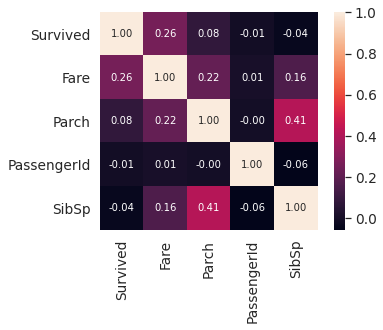

In [14]:
#Survived correlation matrix
k = 5 #number of variables for heatmap
cols = df_train.corr().nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

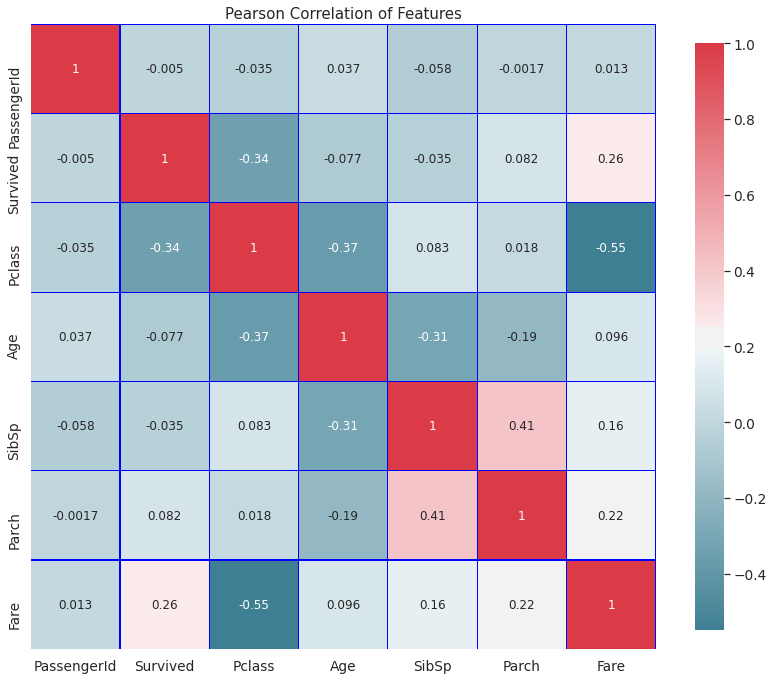

In [15]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='blue',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df_train)

**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

**What is the distribution of categorical features?**

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

### Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating.**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing.**

1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correcting.**

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating.**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived. 
3. The upper-class passengers (Pclass=1) were more likely to have survived.

## Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

- **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#print('_'*50)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [20]:

df_train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


## Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

### Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

**Observations.**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- We should band age groups (creating #3).

### Target Distribution

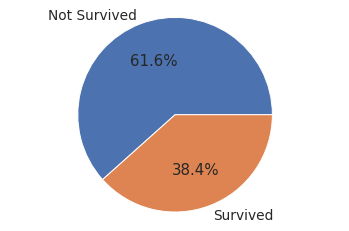

In [21]:
fig1, ax1 = plt.subplots()
ax1.pie(df_train['Survived'].groupby(df_train['Survived']).count(), 
        labels = ['Not Survived', 'Survived'], autopct = '%1.1f%%')
ax1.axis('equal')

plt.show()

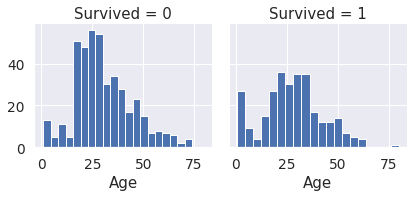

In [22]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

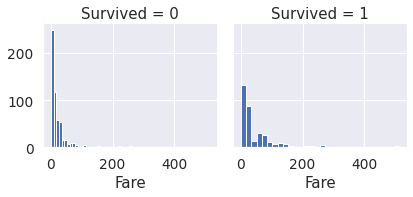

In [23]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Fare', bins=30)

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations.**

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
- Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
- Pclass varies in terms of Age distribution of passengers.

**Decisions.**

- Consider Pclass for model training.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


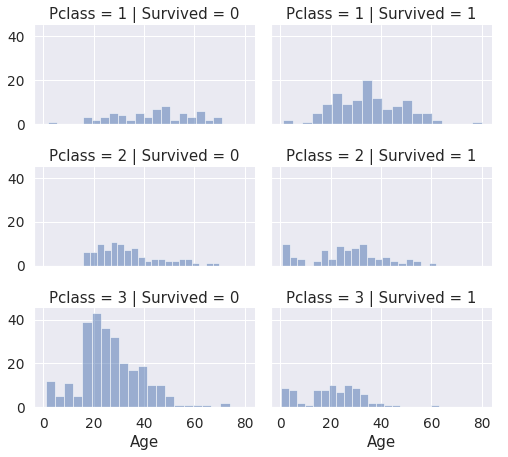

In [24]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Correlating categorical features

Now we can correlate categorical features with our solution goal.

**Observations.**

- Female passengers had much better survival rate than males. Confirms classifying (#1).
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

**Decisions.**

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


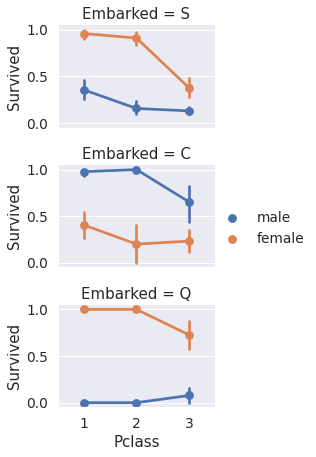

In [25]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(df_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Correlating categorical and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

**Observations.**

- Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
- Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

**Decisions.**

- Consider banding Fare feature.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


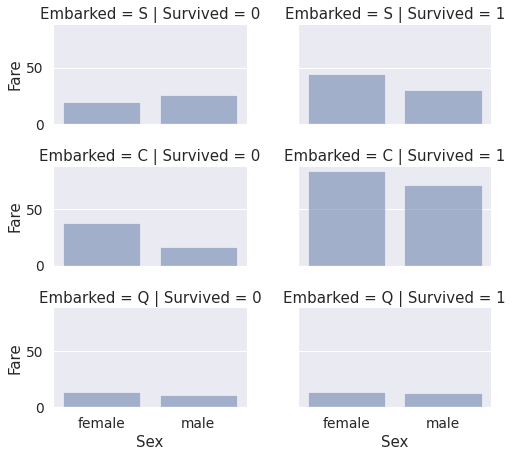

In [26]:


# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

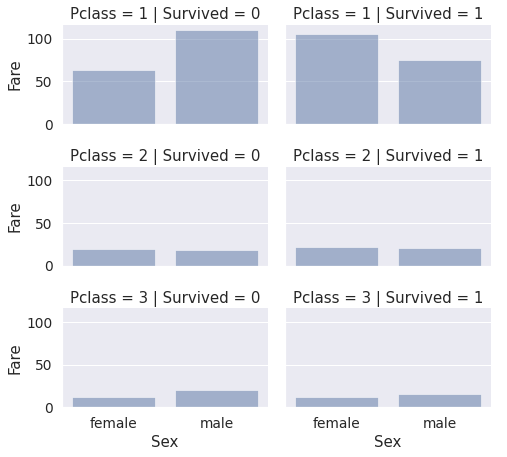

In [27]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df_train, row='Pclass', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

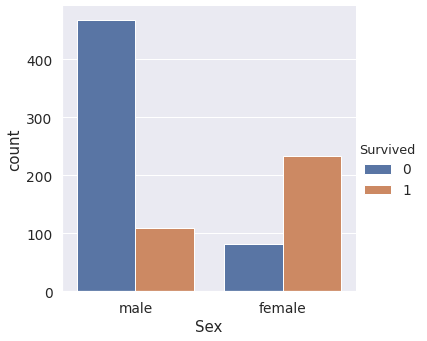

In [28]:
# Countplot 

sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = df_train) 

After observing the above graph, we can say that women were more likely to survived than men as they have high rate of survival than man. Hence, in determining whether a passenger will survive or not, gender(male or female) plays an important role.

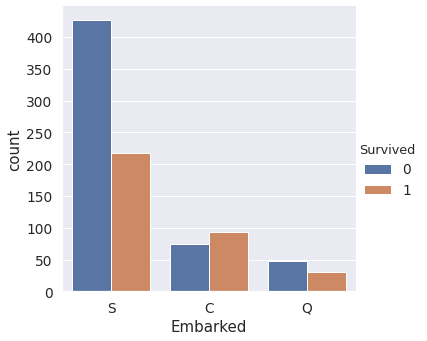

In [29]:
# Countplot 

sns.catplot(x ="Embarked", hue ="Survived", kind ="count", data = df_train) 

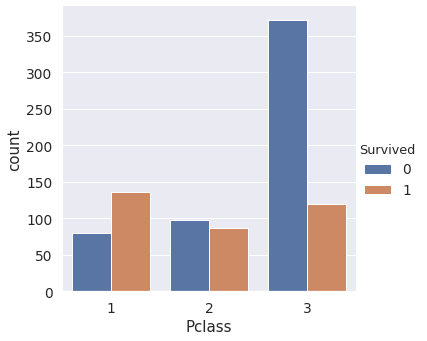

In [30]:
# Countplot 

sns.catplot(x ="Pclass", hue ="Survived", kind ="count", data = df_train) 

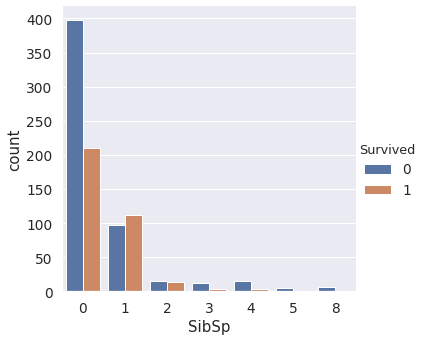

In [31]:
# Countplot 

sns.catplot(x ="SibSp", hue ="Survived", kind ="count", data = df_train) 

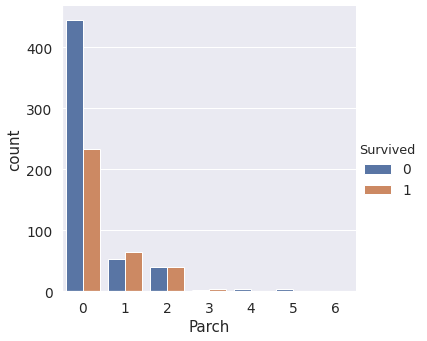

In [32]:
# Countplot 

sns.catplot(x ="Parch", hue ="Survived", kind ="count", data = df_train) 



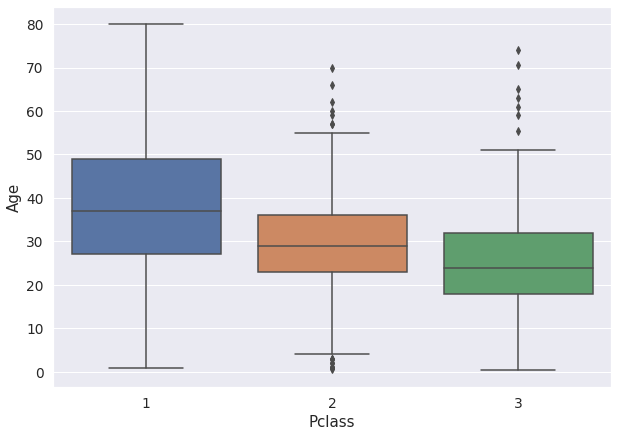

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df_train)


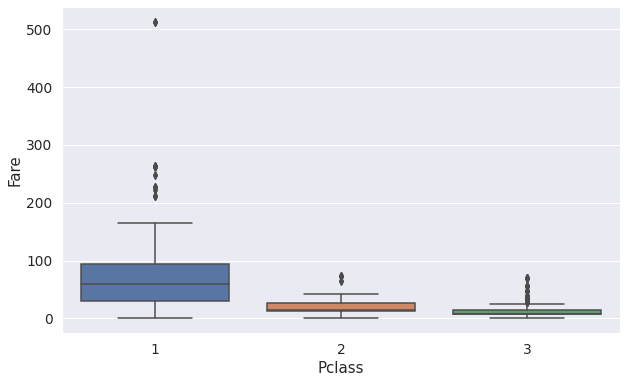

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Fare',data=df_train)


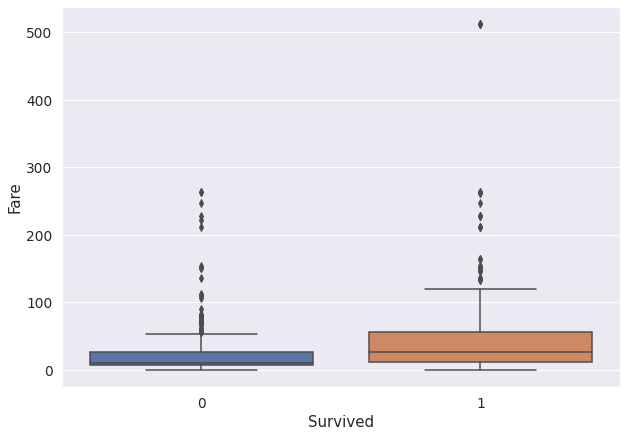

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Survived',y='Fare',data=df_train)


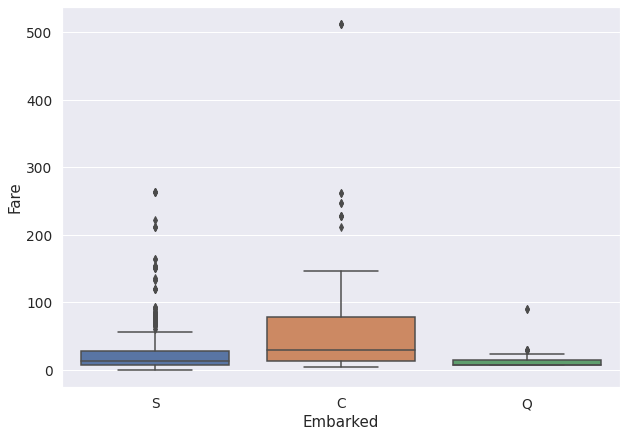

In [36]:
#Embarked
plt.figure(figsize=(10,7))
sns.boxplot(x='Embarked',y='Fare',data=df_train)


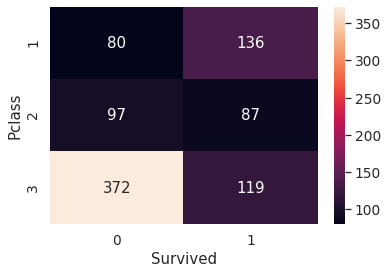

In [37]:
group = df_train.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
  
sns.heatmap(pclass_survived, annot = True, fmt ="d") 

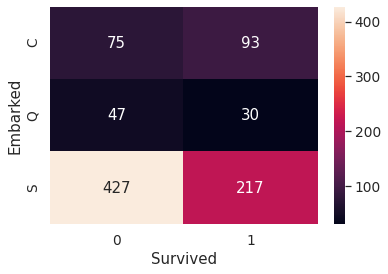

In [38]:
group = df_train.groupby(['Embarked', 'Survived']) 
pclass_survived = group.size().unstack() 
  
sns.heatmap(pclass_survived, annot = True, fmt ="d") 

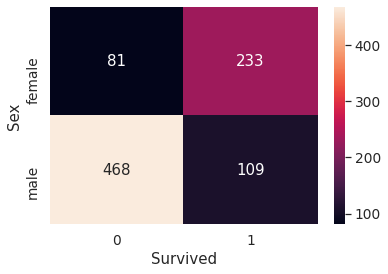

In [39]:
group = df_train.groupby(['Sex', 'Survived']) 
pclass_survived = group.size().unstack() 
  
sns.heatmap(pclass_survived, annot = True, fmt ="d")

<a id="section-two-a"></a>
### 1. Missing Data

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

* Correcting by dropping features
* Correcting by fill features


In [40]:
#missing data in Traing examples
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(12)


,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


before the cleaning data we combine training and test data in order to remain keep the same structure


Clean and Edit Dataframes We must combine train and test datasets. Because This processes are must be carried out together

In [41]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [42]:
na = df_train.shape[0] #na is the number of rows of the original training set
nb = df_test.shape[0]  #nb is the number of rows of the original test set
y_target = df_train['Survived'].to_frame()
#Combine train and test sets
c1 = pd.concat((df_train, df_test), sort=False).reset_index(drop=True)
#Drop the target "Survived" and Id columns
c1.drop(['Survived'], axis=1, inplace=True)
c1.drop(['PassengerId'], axis=1, inplace=True)
print("Total size for train and test sets is :",c1.shape)

Total size for train and test sets is : (1309, 10)


In [43]:
##msv1 method to visualize missing values per columns
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3): 
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

In [44]:
#missing data in Traing examples and test set 
total = c1.isnull().sum().sort_values(ascending=False)
percent = (c1.isnull().sum()/c1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(12)

,Total,Percent
Cabin,1014,0.774637
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


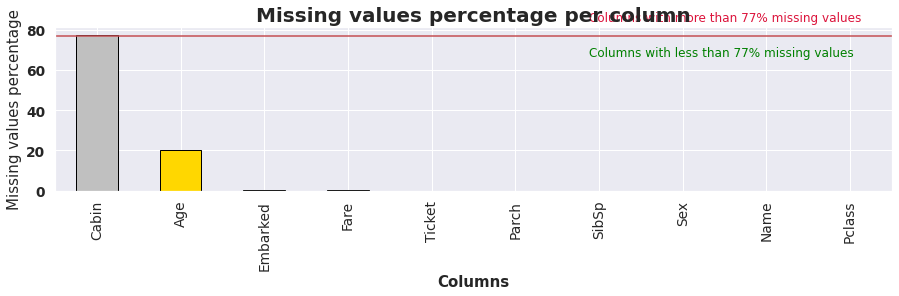

In [45]:
#call method msv1 to visualization missing value per columns 
msv1(c1, 77, color=('silver', 'gold', 'lightgreen', 'skyblue', 'lightpink'))

* But before going any further, we start by cleaning the data from missing values. I set the threshold to 21% (red line), all columns with more than 21% missing values will be dropped.

* First thing to do is get rid of the features with more than 21 % missing values (figure above). For example the Cabine's missing values ,. But replacing those (more than 21%) missing values with "no Cabine" will leave us with a feature with low variance, and low variance features are uniformative for machine learning models. So we drop the features with more than 21 % missing values.

* Features with >21 % missing values , we will drop

In [46]:
# drop columns (features ) with > 79% missing vales
c=c1.dropna(thresh=len(c1)*0.15, axis=1)
print('We dropped ',c1.shape[1]-c.shape[1], ' features in the combined set')

We dropped  0  features in the combined set


In [47]:
print('The shape of the combined dataset after dropping features with more than 21% M.V.', c.shape)

The shape of the combined dataset after dropping features with more than 21% M.V. (1309, 10)


### Now what do we do in combine data that contains less than 21% missing values

In [48]:
allna = (c.isnull().sum() / len(c))*100
allna = allna.drop(allna[allna == 0].index).sort_values()


##msv2 method to visualize missing values per columns less than threshold 
def msv2(data, width=12, height=8, color=('silver', 'gold','lightgreen','skyblue','lightpink'), edgecolor='black'):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    fig, ax = plt.subplots(figsize=(width, height))

    allna = (data.isnull().sum() / len(data))*100
    tightout= 0.008*max(allna)
    allna = allna.drop(allna[allna == 0].index).sort_values().reset_index()
    mn= ax.barh(allna.iloc[:,0], allna.iloc[:,1], color=color, edgecolor=edgecolor)
    ax.set_title('Missing values percentage per column', fontsize=15, weight='bold' )
    ax.set_xlabel('Percentage', weight='bold', size=15)
    ax.set_ylabel('Features with missing values', weight='bold')
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    for i in ax.patches:
        ax.text(i.get_width()+ tightout, i.get_y()+0.1, str(round((i.get_width()), 2))+'%',
            fontsize=10, fontweight='bold', color='grey')
    return plt.show()

### Missing values percentage per column with less than 21 %

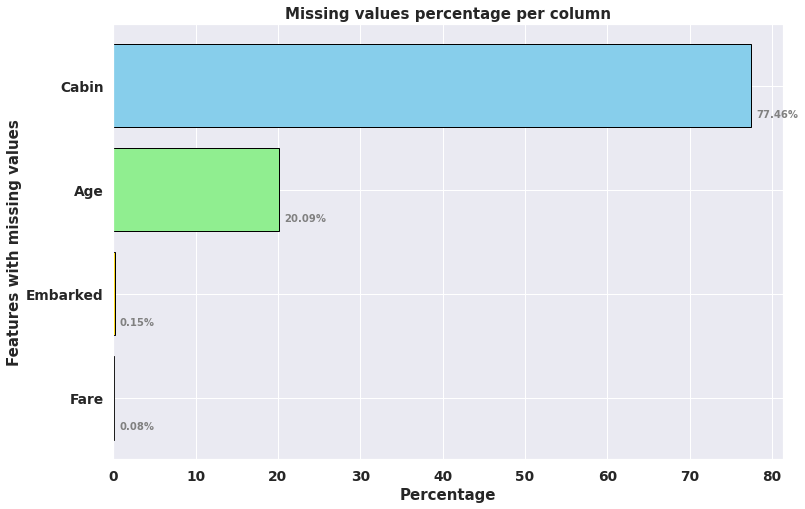

In [49]:
#call method msv2 to visualization missing value per columns less than threshold
msv2(c)

Before compelete cleaning the data, we zoom at the features with missing values, those missing values won't be treated equally. Some features have barely 1 or 2 missing values, we will use thesome methods to fill them.

### We isolate the missing values from the rest of the dataset to have a good idea of how to treat them

In [50]:
NA=c[allna.index.to_list()]

### We split them to:

* Categorical features
* Numerical features

In [51]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print('We have :',NAcat.shape[1],'categorical features with missing values')
print('We have :',NAnum.shape[1],'numerical features with missing values')

We have : 2 categorical features with missing values
We have : 2 numerical features with missing values


### * Numerical features:

In [52]:
NAnum.head()

,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0


In [53]:
NANUM= NAnum.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NANUM = NANUM.style.background_gradient(cmap=cm)
NANUM

,Fare,Age
0,1,263


In [54]:
#complete missing age with median

c['Age']=c.Age.fillna(c.Age.median())

#complete missing Fare (ticket price) with median

c['Fare']=c.Age.fillna(c.Fare.median())


In [55]:
bb=c[allna.index.to_list()]
nan=bb.select_dtypes(exclude='object')
N= nan.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

N= N.style.background_gradient(cmap=cm)
N

,Fare,Age
0,0,0


### * Categorical features:

In [56]:
NAcat.head()

,Embarked,Cabin
0,S,NaN
1,C,C85
2,S,NaN
3,S,C123
4,S,NaN


In [57]:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NAcat1 = NAcat1.style.background_gradient(cmap=cm)
NAcat1

,Embarked,Cabin
0,2,1014


In [58]:
#complete embarked with mode
    
c['Embarked'].fillna(c['Embarked'].mode()[0], inplace = True)

In [59]:
# Replace the Cabin number by the type of cabin 'X' if not
c["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in c['Cabin'] ])

In [60]:
FillNA=c[allna.index.to_list()]



FillNAcat=FillNA.select_dtypes(include='object')

FC= FillNAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

FC= FC.style.background_gradient(cmap=cm)
FC

,Embarked,Cabin
0,0,0


In [61]:
FillNAnum=FillNA.select_dtypes(exclude='object')

FM= FillNAnum.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

FM= FM.style.background_gradient(cmap=cm)
FM

,Fare,Age
0,0,0


In [62]:
c.isnull().sum().sort_values(ascending=False).head(10)

Embarked    0
Cabin       0
Fare        0
Ticket      0
Parch       0
SibSp       0
Age         0
Sex         0
Name        0
Pclass      0
dtype: int64

### 1-Feature engineering
Feature engineering is very important to improve the model's performance

In [63]:
c.shape

(1309, 10)

#### Creating new feature extracting from existing

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

**Observations.**

When we plot Title, Age, and Survived, we note the following observations.

- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

**Decision.**

- We decide to retain the new Title feature for model training.

In [64]:
c.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,22.0,X,S


#### Categorical Feature

### 1.1-Name

In [65]:
c['Title'] = c['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)



In [66]:

c_t=pd.concat([c, y_target], axis=1)

In [67]:
pd.crosstab(c_t['Title'], c_t['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


* We can replace many titles with a more common name or classify them as `Rare`.

In [68]:
#we will just 'None' in categorical features
#Categorical missing values
NAcols=c.columns
for col in NAcols:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("None")
c['Title'] = c['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')


c_t=pd.concat([c, y_target], axis=1)
c_t[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mlle,1.000000
3,Mme,1.000000
4,Mr,0.156673
5,Mrs,0.792000
6,Ms,1.000000
7,Rare,0.347826


* so we have titles. let's categorize it and check the title impact on survival rate.

In [69]:
#for dataset in c:




c['Title'] = c['Title'].replace('Mlle', 'Miss')
c['Title'] = c['Title'].replace('Ms', 'Miss')
c['Title'] = c['Title'].replace('Mme', 'Mrs')


c_t=pd.concat([c, y_target], axis=1)
c_t[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()




,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


###  1.2-SibSp and Parch (Family)

* With the number of siblings/spouse and the number of children/parents we can create new feature called Family Size.

In [70]:
#for dataset in c:
c['FamilySize'] = c['SibSp'] + c['Parch'] + 1



c_t=pd.concat([c, y_target], axis=1)
c_t[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#c_t[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


* it seems has a good effect on our prediction but let's go further and categorize people to check whether they are alone in this ship or not
* We can create another feature called IsAlone.

In [71]:
c['IsAlone'] = 0
c.loc[c['FamilySize'] == 1, 'IsAlone'] = 1


c_t=pd.concat([c, y_target], axis=1)
print (c_t[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


### 1.3-Fare categorize it into 4 ranges.

In [72]:
c.loc[ c['Fare'] <= 7.91, 'Fare'] = 0
c.loc[(c['Fare'] > 7.91) & (c['Fare'] <= 14.454), 'Fare'] = 1
c.loc[(c['Fare'] > 14.454) & (c['Fare'] <= 31), 'Fare']   = 2
c.loc[ c['Fare'] > 31, 'Fare'] = 3

In [73]:
#c['CategoricalFare'] = pd.qcut(c['Fare'], 4)
c_t=pd.concat([c, y_target], axis=1)
print (c_t[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean())

   Fare  Survived
0   0.0  0.680000
1   1.0  0.407407
2   2.0  0.342803
3   3.0  0.405594


### 1.4-Age
* Age is a continous feature, there is a problem with Continous Variables in Machine Learning Models.
* We need to convert these continous values into categorical values
* The maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16

In [74]:
  
c.loc[c['Age']<16,'Age'] = 0
c.loc[(c['Age']>16) & (c['Age']<=32),'Age'] =1
c.loc[(c['Age']>32) & (c['Age']<=48),'Age'] =2
c.loc[(c['Age']>48) & (c['Age']<=64),'Age'] =3
c.loc[c['Age']>64,'Age'] =4
    
#c['CategoricalAge'] = pd.qcut(c['Age'], 4)
c_t=pd.concat([c, y_target], axis=1)
print (c_t[['Age', 'Survived']].groupby(['Age'], as_index=False).mean())    
    
    
    


    Age  Survived
0   0.0  0.590361
1   1.0  0.344168
2   2.0  0.404255
3   3.0  0.434783
4   4.0  0.090909
5  16.0  0.352941


In [75]:
c_t.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Survived
0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,2.0,X,S,Mr,2,0,0.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,3.0,C,C,Mrs,2,0,1.0
2,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,2.0,X,S,Miss,1,1,1.0


### 1.5-Ticket


In [76]:
c.loc[c['Ticket']=='LINE']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
179,3,"Leonard, Mr. Lionel",male,2.0,0,0,LINE,3.0,X,S,Mr,1,1
271,3,"Tornquist, Mr. William Henry",male,1.0,0,0,LINE,2.0,X,S,Mr,1,1
302,3,"Johnson, Mr. William Cahoone Jr",male,1.0,0,0,LINE,2.0,X,S,Mr,1,1
597,3,"Johnson, Mr. Alfred",male,3.0,0,0,LINE,3.0,X,S,Mr,1,1


In [77]:
c['Ticket'] = c['Ticket'].replace('LINE','LINE 0')

In [78]:
# remove dots and slashes
c['Ticket'] = c['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
def get_prefix(ticket):
    lead = ticket.split(' ')[0][0]
    if lead.isalpha():
        return ticket.split(' ')[0]
    else:
        return 'NoPrefix'
    
c['Prefix'] = c['Ticket'].apply(lambda x: get_prefix(x))

#### Next we extract the numeric portion of the ticket. We create extra features such as:

 * 1-The numerical component (TNumeric)
 * 2-Number of digits (TNlen)
 * 3-Leading digit (LeadingDigit)
 * 4-Group similar tickets by discarding the last digits (TGroup)
 
TGroup is a feature that I thought it would help to capture what has been discussed in here. The idea is similar ticket numbers (not just identical numbers) is tied to groups of people. This is important because we know that identifying groups is helpful and looking at just family ties is not sufficient for the best model.

In [79]:
c['TNumeric'] = c['Ticket'].apply(lambda x: int(x.split(' ')[-1])//1)
c['TNlen'] = c['TNumeric'].apply(lambda x : len(str(x)))
c['LeadingDigit'] = c['TNumeric'].apply(lambda x : int(str(x)[0]))
c['TGroup'] = c['Ticket'].apply(lambda x: str(int(x.split(' ')[-1])//10))

c.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Prefix,TNumeric,TNlen,LeadingDigit,TGroup
0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,a5 21171,2.0,X,S,Mr,2,0,a5,21171,5,2,2117
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,pc 17599,3.0,C,C,Mrs,2,0,pc,17599,5,1,1759
2,3,"Heikkinen, Miss. Laina",female,1.0,0,0,stono2 3101282,2.0,X,S,Miss,1,1,stono2,3101282,7,3,310128
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,3.0,C,S,Mrs,2,0,NoPrefix,113803,6,1,11380
4,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,3.0,X,S,Mr,1,1,NoPrefix,373450,6,3,37345


In [80]:
#c['CategoricalAge'] = pd.qcut(c['Age'], 4)
c_t=pd.concat([c, y_target], axis=1)
print (c_t[['LeadingDigit', 'Survived']].groupby(['LeadingDigit'], as_index=False).mean())    
    

   LeadingDigit  Survived
0             0  0.250000
1             1  0.606061
2             2  0.408696
3             3  0.258856
4             4  0.133333
5             5  0.222222
6             6  0.071429
7             7  0.266667
8             8  0.000000
9             9  1.000000


# 1.6-Cabin

In [81]:
#c['CategoricalAge'] = pd.qcut(c['Age'], 4)
c_t=pd.concat([c, y_target], axis=1)
print (c_t[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean())    
    

  Cabin  Survived
0     A  0.466667
1     B  0.744681
2     C  0.593220
3     D  0.757576
4     E  0.750000
5     F  0.615385
6     G  0.500000
7     T  0.000000
8     X  0.299854


In [82]:
c['Cabin'] = c['Cabin'].replace('A', 'Y')
c['Cabin'] = c['Cabin'].replace('B', 'Y')
c['Cabin'] = c['Cabin'].replace('C', 'Y')
c['Cabin'] = c['Cabin'].replace('D', 'Y')
c['Cabin'] = c['Cabin'].replace('E', 'Y')
c['Cabin'] = c['Cabin'].replace('F', 'Y')
c['Cabin'] = c['Cabin'].replace('G', 'Y')
c['Cabin'] = c['Cabin'].replace('T', 'Y')
c['Cabin'] = c['Cabin'].replace('X', 'X')

In [83]:
#c['CategoricalAge'] = pd.qcut(c['Age'], 4)
c_t=pd.concat([c, y_target], axis=1)
print (c_t[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean())   

  Cabin  Survived
0     X  0.299854
1     Y  0.666667


# 4- Encoding categorical features:

### 4.1 Numerical features:
We start with numerical features that are actually categorical, for example "Pclass", the values are from 1 to 12, each number is assigned to a month November is number 11 while March is number 3. 11 is just the order of the months and not a given value, so we convert the "Month Sold" feature to categorical

### Mapping Feature 

In [84]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

c['Title'] = c['Title'].map(title_mapping)
c['Title'] = c['Title'].fillna(0)



c['Sex'] = c['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

c.head()

c['Embarked'] = c['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

c.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Prefix,TNumeric,TNlen,LeadingDigit,TGroup
0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,a5 21171,2.0,X,0,1,2,0,a5,21171,5,2,2117
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,pc 17599,3.0,Y,1,3,2,0,pc,17599,5,1,1759
2,3,"Heikkinen, Miss. Laina",1,1.0,0,0,stono2 3101282,2.0,X,0,2,1,1,stono2,3101282,7,3,310128
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,3.0,Y,0,3,2,0,NoPrefix,113803,6,1,11380
4,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,3.0,X,0,1,1,1,NoPrefix,373450,6,3,37345
5,3,"Moran, Mr. James",0,1.0,0,0,330877,2.0,X,2,1,1,1,NoPrefix,330877,6,3,33087
6,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,3.0,Y,0,1,1,1,NoPrefix,17463,5,1,1746
7,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,0.0,X,0,4,5,0,NoPrefix,349909,6,3,34990
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,2.0,X,0,3,3,0,NoPrefix,347742,6,3,34774
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,1.0,X,1,3,2,0,NoPrefix,237736,6,2,23773


#### Extract new feature after mapping

In [85]:

#c['Sex_Class_Embark'] = 0 
    
c.loc[(c['Sex'] == 1) & ((c['Pclass'] == 1) | (c['Pclass'] == 2) ) & ((c['Embarked'] == 0)  | (c['Embarked'] == 1)  | (c['Embarked'] == 2)),'Sex_Class_Embark'] = 0
    
    
c.loc[(c['Sex'] == 1) & (c['Pclass'] == 3) & ((c['Embarked'] == 1)  | (c['Embarked'] == 2)),'Sex_Class_Embark'] = 1
    

c.loc[(c['Sex'] == 0) & (c['Pclass'] == 1) & ((c['Embarked'] == 0)  | (c['Embarked'] == 1)),'Sex_Class_Embark'] = 2
c.loc[(c['Sex'] == 1) & (c['Pclass'] == 3) & (c['Embarked'] == 0),'Sex_Class_Embark'] = 2
    
    
c.loc[(c['Sex'] == 0) & ((c['Pclass'] == 2)  | (c['Pclass'] == 3) ) & ((c['Embarked'] == 0)  | (c['Embarked'] == 1)  | (c['Embarked'] == 2)),'Sex_Class_Embark'] = 3
    
    
c.loc[(c['Sex'] == 0) & ((c['Pclass'] == 1)  |(c['Pclass'] == 2) ) & (c['Embarked'] == 2),'Sex_Class_Embark'] = 4
    
    

In [86]:
#c['CategoricalFare'] = pd.qcut(c['Fare'], 4)
c_t=pd.concat([c, y_target], axis=1)
print (c_t[['Sex_Class_Embark', 'Survived']].groupby(['Sex_Class_Embark'], as_index=False).mean())

   Sex_Class_Embark  Survived
0               0.0  0.947059
1               1.0  0.696429
2               2.0  0.373206
3               3.0  0.140969
4               4.0  0.000000


In [87]:


c.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Prefix,TNumeric,TNlen,LeadingDigit,TGroup,Sex_Class_Embark
0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,a5 21171,2.0,X,0,1,2,0,a5,21171,5,2,2117,3.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,pc 17599,3.0,Y,1,3,2,0,pc,17599,5,1,1759,0.0


In [88]:
print (c_t[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*60)

print (c_t[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*60)


print (c_t[['Sex_Class_Embark', 'Survived']].groupby(['Sex_Class_Embark'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*60)
#print (c_t[['Name', 'Survived']].groupby(['Name'], as_index=False).mean().sort_values(by='Survived', ascending=False))
#print('_'*60)

print (c_t[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*60)

print (c_t[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*60)


#print (c_t[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean().sort_values(by='Survived', ascending=False))
#print('_'*60)


print (c_t[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*60)



print (c_t[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*60)

print (c_t[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*60)


print (c_t[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*60)


print (c_t[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*60)


print (c_t[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*60)

print (c_t[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*60)




   Sex  Survived
1    1  0.742038
0    0  0.188908
____________________________________________________________
   Embarked  Survived
1         1  0.553571
2         2  0.389610
0         0  0.339009
____________________________________________________________
   Sex_Class_Embark  Survived
0               0.0  0.947059
1               1.0  0.696429
2               2.0  0.373206
3               3.0  0.140969
4               4.0  0.000000
____________________________________________________________
   Title  Survived
2      3  0.793651
1      2  0.702703
3      4  0.575000
4      5  0.347826
0      1  0.156673
____________________________________________________________
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
____________________________________________________________
    Age  Survived
0   0.0  0.590361
3   3.0  0.434783
2   2.0  0.404255
5  16.0  0.352941
1   1.0  0.344168
4   4.0  0.090909
________________________________________________________

#### Dropping UnNeeded Features

Name--> We don't need name feature as it cannot be converted into any categorical value, we extract Title  

Age--> We have the Age_band feature, so no need of this, we extract Age  Range

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded , we extract Fare Range

TNumeric -->We don't need name feature as it cannot be converted into any categorical value.






In [89]:
#c = c.drop([ 'Parch' ,'SibSp','FamilySize',], axis = 1)
#c = c.drop(['Name','Ticket' ,'Parch', 'SibSp' ,'FamilySize' ,'Sex_Class_Embark' ], axis = 1)
#c = c.drop(['Name','Ticket' ,'Parch', 'SibSp' ,'FamilySize' ,'Sex_Class_Embark'], axis = 1)
#c = c.drop(['Name','Ticket','TNumeric','FamilySize' ,'Parch', 'SibSp' ], axis = 1)
c = c.drop(['Name','Ticket','TNumeric','FamilySize'], axis = 1)

In [90]:
c.isnull().sum().sort_values(ascending=False).head(20)

Sex_Class_Embark    0
TGroup              0
LeadingDigit        0
TNlen               0
Prefix              0
IsAlone             0
Title               0
Embarked            0
Cabin               0
Fare                0
Parch               0
SibSp               0
Age                 0
Sex                 0
Pclass              0
dtype: int64

In [91]:
c.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,TNlen,LeadingDigit,Sex_Class_Embark
count,1309.000000,1309.000000,1309.00000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.355997,1.52712,0.498854,0.385027,2.182582,0.394194,1.732620,0.603514,5.323147,2.385027,2.064171
std,0.837836,0.478997,1.92288,1.041658,0.865560,0.717498,0.653499,1.022087,0.489354,0.931240,1.277285,1.161503
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,1.00000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000
50%,3.000000,0.000000,1.00000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,6.000000,2.000000,3.000000
75%,3.000000,1.000000,2.00000,1.000000,0.000000,3.000000,1.000000,2.000000,1.000000,6.000000,3.000000,3.000000
max,3.000000,1.000000,16.00000,8.000000,9.000000,3.000000,2.000000,5.000000,1.000000,7.000000,9.000000,4.000000


In [92]:
c.describe(include=['O'])

,Cabin,Prefix,TGroup
count,1309,1309,1309
unique,2,36,409
top,X,NoPrefix,34708
freq,1014,957,22


In [93]:

c.head(2) 

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,IsAlone,Prefix,TNlen,LeadingDigit,TGroup,Sex_Class_Embark
0,3,0,1.0,1,0,2.0,X,0,1,0,a5,5,2,2117,3.0
1,1,1,2.0,1,0,3.0,Y,1,3,0,pc,5,1,1759,0.0


In [94]:
#c = c.drop(['Name','Ticket','TNumeric','FamilySize' ,'Parch' , 'SibSp','Sex_Class_Embark'], axis = 1)
#c['Sex_Class_Embark'] = c['Sex_Class_Embark'].astype(str)
#c = c.drop(['Name','Ticket','TNumeric','FamilySize'], axis = 1)
c['LeadingDigit'] = c['LeadingDigit'].astype(str)
c['TNlen'] = c['TNlen'].astype(str)
c['IsAlone'] = c['IsAlone'].astype(str)
#c['FamilySize'] = c['FamilySize'].astype(str)
c['Title'] = c['Title'].astype(str)
c['Embarked'] = c['Embarked'].astype(str)
c['Fare'] = c['Fare'].astype(str)
c['Parch'] = c['Parch'].astype(str)
c['SibSp'] = c['SibSp'].astype(str)

c['Age'] = c['Age'].astype(str)
c['Sex'] = c['Sex'].astype(str)
c['Pclass'] = c['Pclass'].astype(str)
c['Cabin'] = c['Cabin'].astype(str)
c['Sex_Class_Embark'] = c['Sex_Class_Embark'].astype(str) 

 

In [95]:
c.describe(include=['O'])

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,IsAlone,Prefix,TNlen,LeadingDigit,TGroup,Sex_Class_Embark
count,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309
unique,3,2,6,7,8,4,2,3,5,2,36,6,10,409,5
top,3,0,1.0,0,0,2.0,X,0,1,1,NoPrefix,6,3,34708,3.0
freq,709,843,787,891,1002,790,1014,916,757,790,957,606,531,22,659


In [96]:
c.shape

(1309, 15)

In [97]:
c.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,IsAlone,Prefix,TNlen,LeadingDigit,TGroup,Sex_Class_Embark
count,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309
unique,3,2,6,7,8,4,2,3,5,2,36,6,10,409,5
top,3,0,1.0,0,0,2.0,X,0,1,1,NoPrefix,6,3,34708,3.0
freq,709,843,787,891,1002,790,1014,916,757,790,957,606,531,22,659


### 4.2 One hot encoding

In [98]:
cb=pd.get_dummies(c)
print("the shape of the original dataset",c.shape)
print("the shape of the encoded dataset",cb.shape)
print("We have ",cb.shape[1]- c.shape[1], 'new encoded features')

the shape of the original dataset (1309, 15)
the shape of the encoded dataset (1309, 508)
We have  493 new encoded features


In [99]:
cb.head(2)

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0.0,Age_1.0,Age_16.0,Age_2.0,Age_3.0,...,TGroup_793,TGroup_847,TGroup_85,TGroup_923,TGroup_954,Sex_Class_Embark_0.0,Sex_Class_Embark_1.0,Sex_Class_Embark_2.0,Sex_Class_Embark_3.0,Sex_Class_Embark_4.0
0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [100]:
cb1=pd.get_dummies(c,drop_first=True)
print("the shape of the original dataset",c.shape)
print("the shape of the encoded dataset",cb1.shape)
print("We have ",cb1.shape[1]- c.shape[1], 'new encoded features')

the shape of the original dataset (1309, 15)
the shape of the encoded dataset (1309, 493)
We have  478 new encoded features


In [101]:
cb1.head(2)

,Pclass_2,Pclass_3,Sex_1,Age_1.0,Age_16.0,Age_2.0,Age_3.0,Age_4.0,SibSp_1,SibSp_2,...,TGroup_759,TGroup_793,TGroup_847,TGroup_85,TGroup_923,TGroup_954,Sex_Class_Embark_1.0,Sex_Class_Embark_2.0,Sex_Class_Embark_3.0,Sex_Class_Embark_4.0
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Grid Search
- Naive Bayes classifier
- KNN or k-Nearest Neighbors
- Random Forrest
- Logistic Regression
- Support Vector Machines
- Decision Tree
- XGBOOST Classifier
- AdaBoosting Classifier
- GradientBoostingClassifier
- HistGradientBoostingClassifier
- Principal Component Analysis (PCA)
- Gaussian Mixture

We split the dataframe to get our original passenger data from the training set and the test set.

In [102]:
# dummy with  dont drop frist
Train = cb[:na]  #na is the number of rows of the original training set
                 
Test = cb[na:]  #testset  after clean missing values and feature engineering and encoder  we do NOT apply outliers on it

# dummy with  drop frist
train_1 = cb1[:na] 
test_1 =  cb1[na:]

In [103]:
print(train_1.shape)
print(y_target.shape)
print(test_1.shape)


(891, 493)
(891, 1)
(418, 493)


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

# NAIBE BAYES
from sklearn.naive_bayes import GaussianNB
#KNN
from sklearn.neighbors import KNeighborsClassifier
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
#SVM
from sklearn.svm import SVC
#DECISON TREE
from sklearn.tree import DecisionTreeClassifier
#XGBOOST
from xgboost import XGBClassifier
#AdaBoosting Classifier
from sklearn.ensemble import AdaBoostClassifier
#GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
#HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, StackingClassifier

from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV




from sklearn.preprocessing import StandardScaler ,Normalizer , MinMaxScaler, RobustScaler 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

We further split the training set in to a train and test set to validate our model.

In [105]:
X_train,X_test,y_train,y_test = train_test_split(train_1,y_target,test_size=0.30 ,  shuffle=True, random_state=42)

### Traing Models with Feature Scaling

### **Feature Scaling**

Two approaches are shown below:
1. The **StandardScaler** assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

2. The **normalizer** scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.

Coming to the modeling part. We first scale the data using standard scaler.
We use grid search with stratified kfold validation for 9 algorithms.
We get the scores from the cross validation for all these models and run a prediction on the test data from our train_test_split.
For stacking we get the accuracy based on fitting the train and test set.

In [106]:
sk_fold = StratifiedKFold(10,shuffle=True, random_state=42)
#sc =StandardScaler()

sc =StandardScaler()
#sc =Normalizer()
#sc = MinMaxScaler()


X_train= sc.fit_transform(X_train)

X_train_1= sc.transform(train_1.values)

X_test= sc.transform(X_test)

X_submit= sc.transform(test_1.values)


g_nb = GaussianNB()
knn = KNeighborsClassifier()
ran_for  = RandomForestClassifier()
log_reg = LogisticRegression()
svc = SVC()
tree= DecisionTreeClassifier()
xgb = XGBClassifier()

ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier(n_estimators=100)
hist_grad_boost = HistGradientBoostingClassifier()




clf = [("Naive Bayes",g_nb,{}),\
       ("K Nearest",knn,{"n_neighbors":[3,5,8],"leaf_size":[25,30,35]}),\
       ("Random Forest",ran_for,{"n_estimators":[100],"random_state":[42],"min_samples_leaf":[5,10,20,40,50],"bootstrap":[False]}),\
       ("Logistic Regression",log_reg,{"penalty":['l2'],"C":[100, 10, 1.0, 0.1, 0.01] , "solver":['saga']}),\
       ("Support Vector",svc,{"kernel": ["linear","rbf"],"gamma":['auto'],"C":[0.1, 1, 10, 100, 1000]}),\
       ("Decision Tree", tree, {}),\
       ("XGBoost",xgb,{"n_estimators":[200],"max_depth":[3,4,5],"learning_rate":[.01,.1,.2],"subsample":[.8],"colsample_bytree":[1],"gamma":[0,1,5],"lambda":[.01,.1,1]}),\
       
       ("Adapative Boost",ada_boost,{"n_estimators":[100],"learning_rate":[.6,.8,1]}),\
       ("Gradient Boost",grad_boost,{}),\
     
       ("Histogram GB",hist_grad_boost,{"loss":["binary_crossentropy"],"min_samples_leaf":[5,10,20,40,50],"l2_regularization":[0,.1,1]})]


stack_list=[]
train_scores = pd.DataFrame(columns=["Name","Train Score","Test Score"])

i=0
for name,clf1,param_grid in clf:
    clf = GridSearchCV(clf1,param_grid=param_grid,scoring="accuracy",cv=sk_fold,return_train_score=True)
    clf.fit(X_train,y_train) #.reshape(-1,1)
    y_pred = clf.best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    
    #train_scores.loc[i]= [name,cross_val_score(clf,X_train,y_train,cv=sk_fold,scoring="accuracy").mean(),(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])]
    train_scores.loc[i]= [name,clf.best_score_,(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])]
    stack_list.append(clf.best_estimator_)
    i=i+1
    
est = [("g_nb",stack_list[0]),\
       ("knn",stack_list[1]),\
       ("ran_for",stack_list[2]),\
       ("log_reg",stack_list[3]),\
       ("svc",stack_list[4]),\
       ("dec_tree",stack_list[5]),\
       ("XGBoost",stack_list[6]),\
       ("ada_boost",stack_list[7]),\
       ("grad_boost",stack_list[8]),\
       ("hist_grad_boost",stack_list[9])]



sc = StackingClassifier(estimators=est,final_estimator = None,cv=sk_fold,passthrough=False)
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred)
y_pred_train = sc.predict(X_train)
cm2 = confusion_matrix(y_train,y_pred_train)
train_scores.append(pd.Series(["Stacking",(cm2[0,0]+cm2[1,1,])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]),(cm1[0,0]+cm1[1,1,])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])],index=train_scores.columns),ignore_index=True)


,Name,Train Score,Test Score
0,Naive Bayes,0.560113,0.548507
1,K Nearest,0.707604,0.667910
2,Random Forest,0.797670,0.798507
3,Logistic Regression,0.832924,0.805970
4,Support Vector,0.836150,0.820896
5,Decision Tree,0.805709,0.817164
6,XGBoost,0.840911,0.802239
7,Adapative Boost,0.826523,0.847015
8,Gradient Boost,0.839273,0.835821
9,Histogram GB,0.826523,0.798507


In [107]:
#Import Libraries
from sklearn.ensemble import VotingClassifier
#----------------------------------------------------
#Applying VotingClassifier Model 
'''
ensemble.VotingClassifier(estimators, voting=’hard’, weights=None,n_jobs=None, flatten_transform=None)
'''
#loading Voting Classifier
VotingClassifierModel = VotingClassifier(estimators=[("grad_boost",stack_list[8]),("svc",stack_list[4]) , ("ada_boost",stack_list[7])], voting='hard')
VotingClassifierModel.fit(X_train, y_train)


#Calculating Details
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))
print('----------------------------------------------------')

VotingClassifierModel Train Score is :  0.9406099518459069
VotingClassifierModel Test Score is :  0.8432835820895522
----------------------------------------------------


We fit and predict on the best SVC model that we derived based on the scores.

In [108]:
y=df_train['Survived'].to_frame()
print(X_train_1.shape)
print(y.shape)
print(X_submit.shape)



(891, 493)
(891, 1)
(418, 493)


In [109]:
#Calculating Prediction

y_submit = VotingClassifierModel.predict(X_submit)
submit = pd.DataFrame({
        "PassengerId": df_test.PassengerId,
        "Survived": y_submit
    })

Exporting the data to submit.

In [110]:

submit.PassengerId = submit.PassengerId.astype(int)
submit.Survived = submit.Survived.astype(int)
submit.to_csv("titanic_submit.csv", index=False)

In [111]:
print('Predicted Value for VotingClassifierModel is : ' , y_submit[:10])
 



Predicted Value for VotingClassifierModel is :  [0 1 0 0 1 0 1 0 1 0]


## **Principal Component Analysis**

PCA helps us to identify patterns in data based on the correlation between features. Used to reduce number of variables in your data by extracting important one from a large pool. Thus, it reduces the dimension of your data with the aim of retaining as much information as possible.

Here we will use a straightforward PCA, asking it to preserve 85% of the variance in the projected data.

In [112]:
'''
# dummy with  dont drop frist
Train = cb[:na]  #na is the number of rows of the original training set
                 
Test = cb[na:]  #testset  after clean missing values and feature engineering and encoder  we do NOT apply outliers on it

# dummy with  drop frist
train_1 = cb1[:na] 
test_1 =  cb1[na:]

print(train_1.shape)
print(y_target.shape)
print(test_1.shape)
'''

'\n# dummy with  dont drop frist\nTrain = cb[:na]  #na is the number of rows of the original training set\n                 \nTest = cb[na:]  #testset  after clean missing values and feature engineering and encoder  we do NOT apply outliers on it\n\n# dummy with  drop frist\ntrain_1 = cb1[:na] \ntest_1 =  cb1[na:]\n\nprint(train_1.shape)\nprint(y_target.shape)\nprint(test_1.shape)\n'

In [113]:
'''
from sklearn.decomposition import PCA

pca = PCA(0.95, whiten=True)
pca_train_data = pca.fit_transform(train_1)
print(pca_train_data.shape,'\n')

explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)
'''

"\nfrom sklearn.decomposition import PCA\n\npca = PCA(0.95, whiten=True)\npca_train_data = pca.fit_transform(train_1)\nprint(pca_train_data.shape,'\n')\n\nexplained_variance = pca.explained_variance_ratio_ \nprint(explained_variance)\n"

Introducing another concept now i.e. **K-Fold Cross-validation**, sometimes called rotation estimation, is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set.

Cross-Validation can be used to evaluate performance of a model by handling the variance problem of the result set.

In this approach, the data used for training and testing are non-overlapping. To implement, first separate your data set into two subsets. One subset you use for training and other for testing. Now, do the exercise again by swapping the data sets. Report the average test result. This is call 2-fold cross validation. 

Similarly if you divide your entire data set in to five sub sets and perform the exercise ten times and report the average test result then that would be 10-fold cross validation (which is what we'll be doing now).

In [114]:
'''
train_1=pd.DataFrame(pca_train_data)
test_1=pd.DataFrame(pca.transform(test_1))

print(train_1.shape)
print(y_target.shape)
print(test_1.shape)
'''

'\ntrain_1=pd.DataFrame(pca_train_data)\ntest_1=pd.DataFrame(pca.transform(test_1))\n\nprint(train_1.shape)\nprint(y_target.shape)\nprint(test_1.shape)\n'

We further split the training set in to a train and test set to validate our model.

In [115]:
'''
X_train,X_test,y_train,y_test = train_test_split(train_1,y_target,test_size=0.30, random_state=42)
'''

'\nX_train,X_test,y_train,y_test = train_test_split(train_1,y_target,test_size=0.30, random_state=42)\n'

In [116]:
'''
sk_fold = StratifiedKFold(10,shuffle=True, random_state=42)
#sc =StandardScaler()

sc =StandardScaler()
#sc =Normalizer()
#sc = MinMaxScaler()


X_train= sc.fit_transform(X_train)

X_train_1= sc.transform(train_1.values)

X_test= sc.transform(X_test)

X_submit= sc.transform(test_1.values)


g_nb = GaussianNB()
knn = KNeighborsClassifier()
ran_for  = RandomForestClassifier()
log_reg = LogisticRegression()
svc = SVC()
tree= DecisionTreeClassifier()
xgb = XGBClassifier()

ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier(n_estimators=100)
hist_grad_boost = HistGradientBoostingClassifier()




clf = [("Naive Bayes",g_nb,{}),\
       ("K Nearest",knn,{"n_neighbors":[3,5,8],"leaf_size":[25,30,35]}),\
       ("Random Forest",ran_for,{"n_estimators":[100],"random_state":[42],"min_samples_leaf":[5,10,20,40,50],"bootstrap":[False]}),\
       ("Logistic Regression",log_reg,{"penalty":['l2'],"C":[100, 10, 1.0, 0.1, 0.01] , "solver":['saga']}),\
       ("Support Vector",svc,{"kernel": ["linear","rbf"],"gamma":['auto'],"C":[0.1, 1, 10, 100, 1000]}),\
       ("Decision Tree", tree, {}),\
       ("XGBoost",xgb,{"n_estimators":[200],"max_depth":[3,4,5],"learning_rate":[.01,.1,.2],"subsample":[.8],"colsample_bytree":[1],"gamma":[0,1,5],"lambda":[.01,.1,1]}),\
       
       ("Adapative Boost",ada_boost,{"n_estimators":[100],"learning_rate":[.6,.8,1]}),\
       ("Gradient Boost",grad_boost,{}),\
     
       ("Histogram GB",hist_grad_boost,{"loss":["binary_crossentropy"],"min_samples_leaf":[5,10,20,40,50],"l2_regularization":[0,.1,1]})]


stack_list=[]
train_scores = pd.DataFrame(columns=["Name","Train Score","Test Score"])

i=0
for name,clf1,param_grid in clf:
    clf = GridSearchCV(clf1,param_grid=param_grid,scoring="accuracy",cv=sk_fold,return_train_score=True)
    clf.fit(X_train,y_train) #.reshape(-1,1)
    y_pred = clf.best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    
    #train_scores.loc[i]= [name,cross_val_score(clf,X_train,y_train,cv=sk_fold,scoring="accuracy").mean(),(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])]
    train_scores.loc[i]= [name,clf.best_score_,(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])]
    stack_list.append(clf.best_estimator_)
    i=i+1
    
est = [("g_nb",stack_list[0]),\
       ("knn",stack_list[1]),\
       ("ran_for",stack_list[2]),\
       ("log_reg",stack_list[3]),\
       ("svc",stack_list[4]),\
       ("dec_tree",stack_list[5]),\
       ("XGBoost",stack_list[6]),\
       ("ada_boost",stack_list[7]),\
       ("grad_boost",stack_list[8]),\
       ("hist_grad_boost",stack_list[9])]




'''

'\nsk_fold = StratifiedKFold(10,shuffle=True, random_state=42)\n#sc =StandardScaler()\n\nsc =StandardScaler()\n#sc =Normalizer()\n#sc = MinMaxScaler()\n\n\nX_train= sc.fit_transform(X_train)\n\nX_train_1= sc.transform(train_1.values)\n\nX_test= sc.transform(X_test)\n\nX_submit= sc.transform(test_1.values)\n\n\ng_nb = GaussianNB()\nknn = KNeighborsClassifier()\nran_for  = RandomForestClassifier()\nlog_reg = LogisticRegression()\nsvc = SVC()\ntree= DecisionTreeClassifier()\nxgb = XGBClassifier()\n\nada_boost = AdaBoostClassifier()\ngrad_boost = GradientBoostingClassifier(n_estimators=100)\nhist_grad_boost = HistGradientBoostingClassifier()\n\n\n\n\nclf = [("Naive Bayes",g_nb,{}),       ("K Nearest",knn,{"n_neighbors":[3,5,8],"leaf_size":[25,30,35]}),       ("Random Forest",ran_for,{"n_estimators":[100],"random_state":[42],"min_samples_leaf":[5,10,20,40,50],"bootstrap":[False]}),       ("Logistic Regression",log_reg,{"penalty":[\'l2\'],"C":[100, 10, 1.0, 0.1, 0.01] , "solver":[\'saga\']})

In [117]:
'''
sc = StackingClassifier(estimators=est,final_estimator = None,cv=sk_fold,passthrough=False)
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred)
y_pred_train = sc.predict(X_train)
cm2 = confusion_matrix(y_train,y_pred_train)
train_scores.append(pd.Series(["Stacking",(cm2[0,0]+cm2[1,1,])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]),(cm1[0,0]+cm1[1,1,])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])],index=train_scores.columns),ignore_index=True)

'''

'\nsc = StackingClassifier(estimators=est,final_estimator = None,cv=sk_fold,passthrough=False)\nsc.fit(X_train,y_train)\ny_pred = sc.predict(X_test)\ncm1 = confusion_matrix(y_test,y_pred)\ny_pred_train = sc.predict(X_train)\ncm2 = confusion_matrix(y_train,y_pred_train)\ntrain_scores.append(pd.Series(["Stacking",(cm2[0,0]+cm2[1,1,])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]),(cm1[0,0]+cm1[1,1,])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])],index=train_scores.columns),ignore_index=True)\n\n'

## **Applying Gaussian Mixture and Grid Search to improve the accuracy**

We select the above three algorithms **(KNN, Random Forest and SVM)** which  gave maximum accuracy for further analysis

In [118]:
'''
# dummy with  dont drop frist
train = cb[:na]  #na is the number of rows of the original training set
                 
test = cb[na:]  #testset  after clean missing values and feature engineering and encoder  we do NOT apply outliers on it

# dummy with  drop frist
train_1 = cb1[:na] 
test_1 =  cb1[na:]

print(train_1.shape)
print(y_target.shape)
print(test_1.shape)
print("****************************************************")
print(train.shape)
print(y_target.shape)
print(test.shape)

'''

'\n# dummy with  dont drop frist\ntrain = cb[:na]  #na is the number of rows of the original training set\n                 \ntest = cb[na:]  #testset  after clean missing values and feature engineering and encoder  we do NOT apply outliers on it\n\n# dummy with  drop frist\ntrain_1 = cb1[:na] \ntest_1 =  cb1[na:]\n\nprint(train_1.shape)\nprint(y_target.shape)\nprint(test_1.shape)\nprint("****************************************************")\nprint(train.shape)\nprint(y_target.shape)\nprint(test.shape)\n\n'

In [119]:
'''
# Importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC

X = np.r_[train,test]
print('X shape :',X.shape)
print('\n')

# USING THE GAUSSIAN MIXTURE MODEL 

#The Bayesian information criterion (BIC) can be used to select the number of components in a Gaussian Mixture in an efficient way. 
#In theory, it recovers the true number of components only in the asymptotic regime
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)

#The GaussianMixture comes with different options to constrain the covariance of the difference classes estimated: 
# spherical, diagonal, tied or full covariance.
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.aic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
best_gmm.fit(X)
gmm_train = best_gmm.predict_proba(train)
gmm_test = best_gmm.predict_proba(test)
'''

"\n# Importing libraries\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV, cross_val_score\nfrom sklearn.mixture import GaussianMixture\nfrom sklearn.svm import SVC\n\nX = np.r_[train,test]\nprint('X shape :',X.shape)\nprint('\n')\n\n# USING THE GAUSSIAN MIXTURE MODEL \n\n#The Bayesian information criterion (BIC) can be used to select the number of components in a Gaussian Mixture in an efficient way. \n#In theory, it recovers the true number of components only in the asymptotic regime\nlowest_bic = np.infty\nbic = []\nn_components_range = range(1, 7)\n\n#The GaussianMixture comes with different options to constrain the covariance of the difference classes estimated: \n# spherical, diagonal, tied or full covariance.\ncv_types = ['spherical', 'tied', 'diag', 'full']\nfor cv_type in cv_types:\n    for n_components in n_components_range:\n        gmm = GaussianMixture(n_components=n_c

The **predict_proba** method will take in new data points and predict the responsibilities for each Gaussian. In other words, the probability that this data point came from each distribution.



**Now Applying Grid Search Algorithm:** 

To identify the best algorithm and best parameters

In [120]:
'''
X_train,X_test,y_train,y_test = train_test_split(gmm_train,y_target,test_size=0.30, random_state=101)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
'''

'\nX_train,X_test,y_train,y_test = train_test_split(gmm_train,y_target,test_size=0.30, random_state=101)\nX_train.shape,X_test.shape,y_train.shape,y_test.shape\n'

In [121]:
'''
sk_fold = StratifiedKFold(10,shuffle=True, random_state=42)


X_train= X_train


X_train_1= pd.DataFrame(gmm_train).values

X_test= X_test

X_submit =  pd.DataFrame(gmm_test).values

g_nb = GaussianNB()
knn = KNeighborsClassifier()
ran_for  = RandomForestClassifier()
log_reg = LogisticRegression()
svc = SVC()
tree= DecisionTreeClassifier()
xgb = XGBClassifier()

ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier(n_estimators=100)
hist_grad_boost = HistGradientBoostingClassifier()




clf = [("Naive Bayes",g_nb,{}),\
       ("K Nearest",knn,{"n_neighbors":[3,5,6,7,8,9,10],"leaf_size":[25,30,35]}),\
       ("Random Forest",ran_for,{"n_estimators":[10, 50, 100, 200,400],"max_depth":[3, 10, 20, 40],"random_state":[99],"min_samples_leaf":[5,10,20,40,50],"bootstrap":[False]}),\
       ("Logistic Regression",log_reg,{"penalty":['l2'],"C":[100, 10, 1.0, 0.1, 0.01] , "solver":['saga']}),\
       ("Support Vector",svc,{"kernel": ["linear","rbf"],"gamma":[0.05,0.0001,0.01,0.001],"C":[0.1, 1, 10, 100, 1000]},),\
      
       ("Decision Tree", tree, {}),\
       ("XGBoost",xgb,{"n_estimators":[200],"max_depth":[3,4,5],"learning_rate":[.01,.1,.2],"subsample":[.8],"colsample_bytree":[1],"gamma":[0,1,5],"lambda":[.01,.1,1]}),\
       
       ("Adapative Boost",ada_boost,{"n_estimators":[100],"learning_rate":[.6,.8,1]}),\
       ("Gradient Boost",grad_boost,{}),\
     
       ("Histogram GB",hist_grad_boost,{"loss":["binary_crossentropy"],"min_samples_leaf":[5,10,20,40,50],"l2_regularization":[0,.1,1]})]


stack_list=[]
train_scores = pd.DataFrame(columns=["Name","Train Score","Test Score"])

i=0
for name,clf1,param_grid in clf:
    clf = GridSearchCV(clf1,param_grid=param_grid,scoring="accuracy",cv=sk_fold,return_train_score=True)
    clf.fit(X_train,y_train) #.reshape(-1,1)
    y_pred = clf.best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    
    #train_scores.loc[i]= [name,cross_val_score(clf,X_train,y_train,cv=sk_fold,scoring="accuracy").mean(),(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])]
    train_scores.loc[i]= [name,clf.best_score_,(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])]
    stack_list.append(clf.best_estimator_)
    i=i+1
    
est = [("g_nb",stack_list[0]),\
       ("knn",stack_list[1]),\
       ("ran_for",stack_list[2]),\
       ("log_reg",stack_list[3]),\
       ("svc",stack_list[4]),\
       ("dec_tree",stack_list[5]),\
       ("XGBoost",stack_list[6]),\
       ("ada_boost",stack_list[7]),\
       ("grad_boost",stack_list[8]),\
       ("hist_grad_boost",stack_list[9])]




'''


'\nsk_fold = StratifiedKFold(10,shuffle=True, random_state=42)\n\n\nX_train= X_train\n\n\nX_train_1= pd.DataFrame(gmm_train).values\n\nX_test= X_test\n\nX_submit =  pd.DataFrame(gmm_test).values\n\ng_nb = GaussianNB()\nknn = KNeighborsClassifier()\nran_for  = RandomForestClassifier()\nlog_reg = LogisticRegression()\nsvc = SVC()\ntree= DecisionTreeClassifier()\nxgb = XGBClassifier()\n\nada_boost = AdaBoostClassifier()\ngrad_boost = GradientBoostingClassifier(n_estimators=100)\nhist_grad_boost = HistGradientBoostingClassifier()\n\n\n\n\nclf = [("Naive Bayes",g_nb,{}),       ("K Nearest",knn,{"n_neighbors":[3,5,6,7,8,9,10],"leaf_size":[25,30,35]}),       ("Random Forest",ran_for,{"n_estimators":[10, 50, 100, 200,400],"max_depth":[3, 10, 20, 40],"random_state":[99],"min_samples_leaf":[5,10,20,40,50],"bootstrap":[False]}),       ("Logistic Regression",log_reg,{"penalty":[\'l2\'],"C":[100, 10, 1.0, 0.1, 0.01] , "solver":[\'saga\']}),       ("Support Vector",svc,{"kernel": ["linear","rbf"],"g

In [122]:
'''
sc = StackingClassifier(estimators=est,final_estimator = None,cv=sk_fold,passthrough=False)
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred)
y_pred_train = sc.predict(X_train)
cm2 = confusion_matrix(y_train,y_pred_train)
train_scores.append(pd.Series(["Stacking",(cm2[0,0]+cm2[1,1,])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]),(cm1[0,0]+cm1[1,1,])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])],index=train_scores.columns),ignore_index=True)

'''

'\nsc = StackingClassifier(estimators=est,final_estimator = None,cv=sk_fold,passthrough=False)\nsc.fit(X_train,y_train)\ny_pred = sc.predict(X_test)\ncm1 = confusion_matrix(y_test,y_pred)\ny_pred_train = sc.predict(X_train)\ncm2 = confusion_matrix(y_train,y_pred_train)\ntrain_scores.append(pd.Series(["Stacking",(cm2[0,0]+cm2[1,1,])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]),(cm1[0,0]+cm1[1,1,])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])],index=train_scores.columns),ignore_index=True)\n\n'


We fit and predict on the best XGB model that we derived based on the scores.

In [123]:
'''
y=df_train['Survived'].to_frame()
'''

"\ny=df_train['Survived'].to_frame()\n"

In [124]:
'''
print(X_train_1.shape)
print(y.shape)
print(X_submit.shape)
'''



'\nprint(X_train_1.shape)\nprint(y.shape)\nprint(X_submit.shape)\n'

In [125]:

'''
stack_list[7].fit(X_train_1,y)
y_submit = stack_list[7].predict(X_submit)
submit = pd.DataFrame({
        "PassengerId": df_test.PassengerId,
        "Survived": y_submit
    })
    
'''

'\nstack_list[7].fit(X_train_1,y)\ny_submit = stack_list[7].predict(X_submit)\nsubmit = pd.DataFrame({\n        "PassengerId": df_test.PassengerId,\n        "Survived": y_submit\n    })\n    \n'

Exporting the data to submit.

In [126]:
    
'''
submit.PassengerId = submit.PassengerId.astype(int)
submit.Survived = submit.Survived.astype(int)
submit.to_csv("titanic_submit.csv", index=False)
    
'''

'\nsubmit.PassengerId = submit.PassengerId.astype(int)\nsubmit.Survived = submit.Survived.astype(int)\nsubmit.to_csv("titanic_submit.csv", index=False)\n    \n'

In [127]:
    
'''
submit.PassengerId = submit.PassengerId.astype(int)
submit.Survived = submit.Survived.astype(int)
submit.to_csv("titanic_submit.csv", index=False)
    
'''

'\nsubmit.PassengerId = submit.PassengerId.astype(int)\nsubmit.Survived = submit.Survived.astype(int)\nsubmit.to_csv("titanic_submit.csv", index=False)\n    \n'